## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Load data and view random samples from the dataset
data  = pd.read_csv('Hotel Bookings.csv')
data.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
97255,City Hotel,0,69,2016,September,38,11,2,1,2,...,No Deposit,9.0,NaN,0,Transient,135.90,0,1,Check-Out,2016-09-14
29693,Resort Hotel,0,8,2016,December,53,29,0,1,2,...,No Deposit,NaN,470.0,0,Transient,44.00,0,1,Check-Out,2016-12-30
89109,City Hotel,0,0,2016,May,21,17,0,0,2,...,No Deposit,6.0,NaN,0,Transient,0.00,0,0,Check-Out,2016-05-17
37977,Resort Hotel,0,317,2017,June,26,25,4,6,2,...,No Deposit,40.0,NaN,0,Contract,70.20,0,0,Check-Out,2017-07-05
39946,Resort Hotel,0,59,2017,August,35,27,2,4,2,...,No Deposit,240.0,NaN,0,Transient,168.00,0,0,Check-Out,2017-09-02
51207,City Hotel,1,451,2016,May,21,16,1,2,2,...,Non Refund,1.0,NaN,0,Transient,60.00,0,0,Canceled,2016-03-14
20469,Resort Hotel,0,0,2017,March,11,17,0,1,1,...,No Deposit,NaN,NaN,0,Transient,63.00,0,0,Check-Out,2017-03-18
88811,City Hotel,0,71,2016,May,20,10,0,3,2,...,No Deposit,205.0,NaN,0,Transient-Party,126.00,0,1,Check-Out,2016-05-13
2760,Resort Hotel,0,4,2015,October,44,30,1,2,1,...,No Deposit,241.0,NaN,0,Transient,47.12,0,0,Check-Out,2015-11-02
14189,Resort Hotel,0,61,2015,October,41,6,1,5,2,...,No Deposit,NaN,NaN,0,Transient,62.50,1,1,Check-Out,2015-10-12


In [3]:
# Overview of features in the dataset
print(data.columns)
print("Number of Columns in the dataset: ",len(data.columns))

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
Number of Columns in the dataset:  32


In [4]:
# Datatype of the columns
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
print("The dataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))

The dataset has 119390 rows and 32 columns


In [6]:
# To better understand the insights on the numeric data lets see the
# Statistcal analysis
data.describe().T


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


* Features like agen, company, children seems to be having some missing data from their count

In [7]:
print("Is there a NaN value in the dataset: ",data.isnull().values.any())

Is there a NaN value in the dataset:  True


In [8]:
# Count of NaN in the dataset
data.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [9]:
# Percent of NaN in the dataset
data.isna().sum().sort_values(ascending=False)/ len(data)*100

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

* We have features like children, country, agent and company with missing values that we have confirmed from data.describe as well

In [10]:
# Display the unique number of values for each feature in the dataset
data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

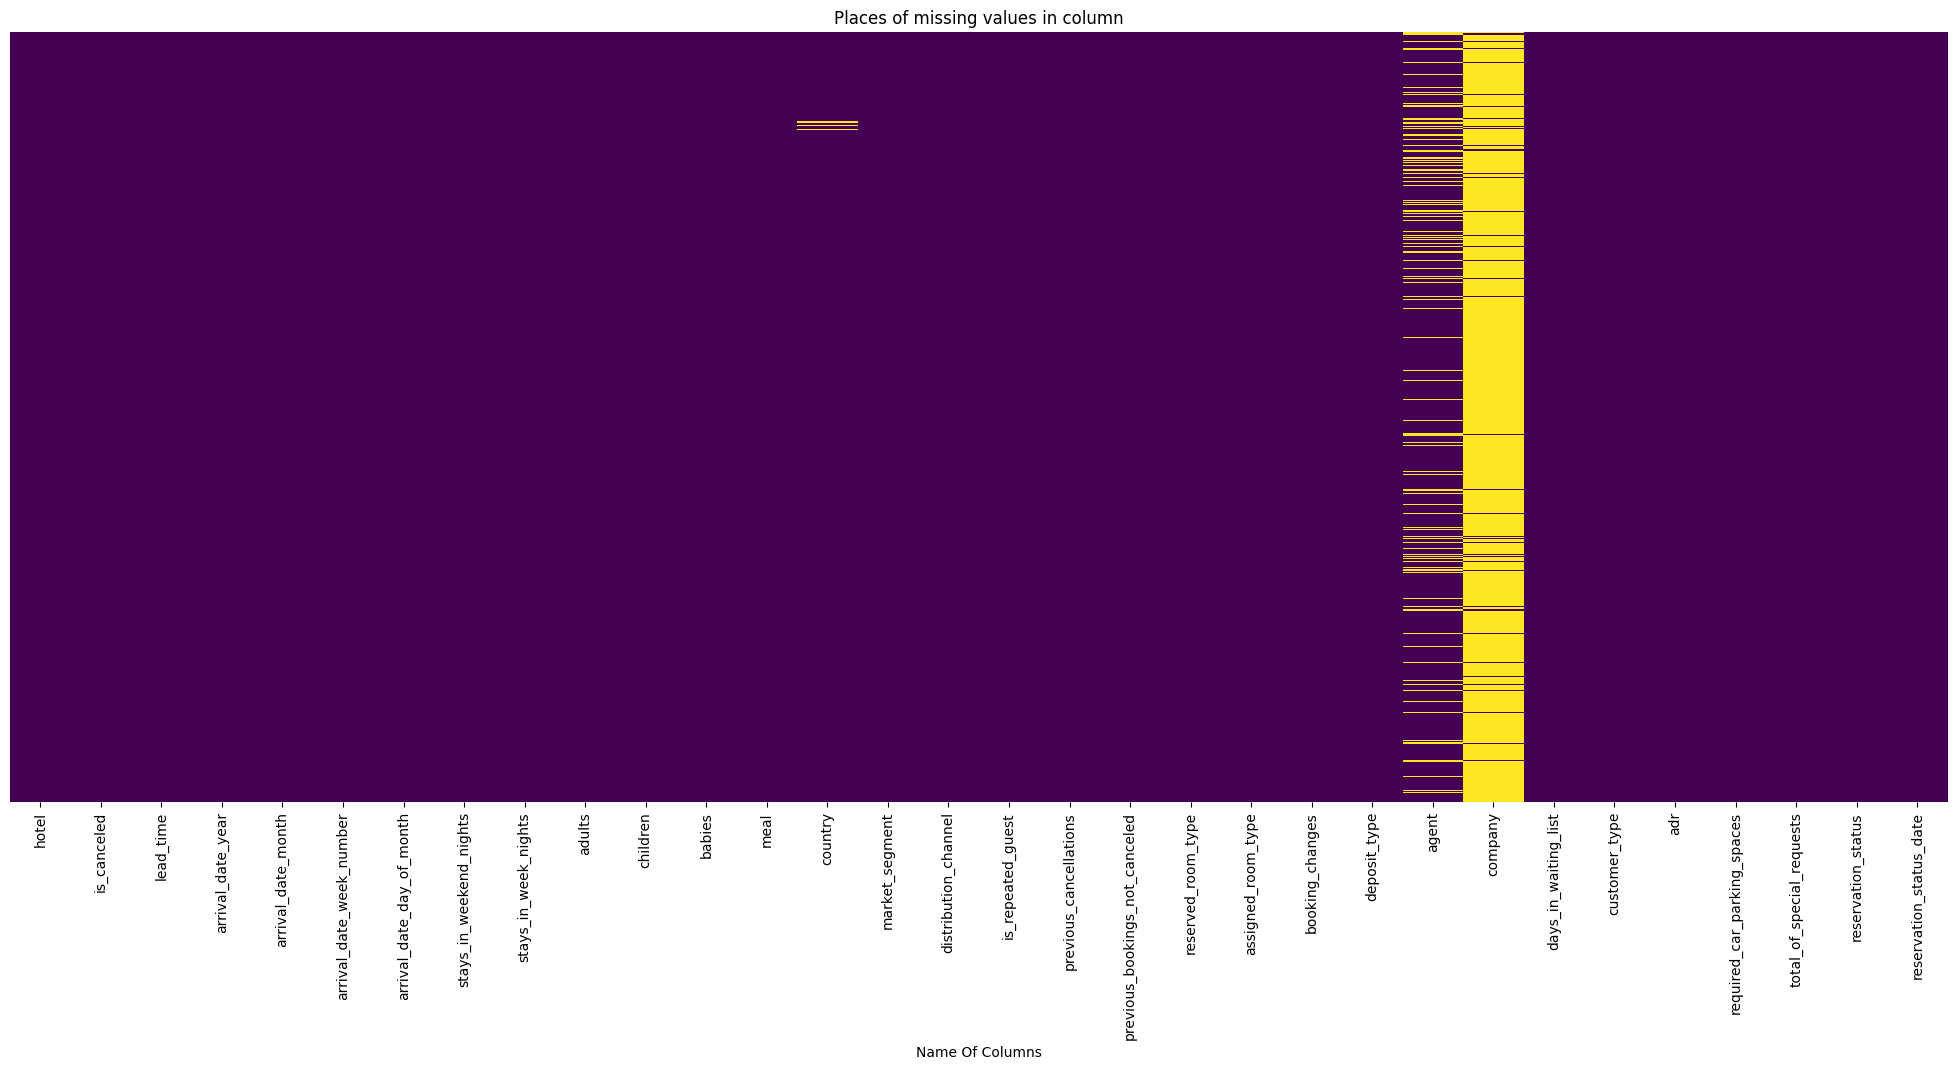

In [11]:
# handling Missing Data

plt.figure(figsize=(25,10))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap = 'viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")
plt.show()

## Handling NaN
### So we Have Null values in columns- Company, agent, Country,children.

* for company and agent we will fill the Missing values with 0
* for country we will fill Missing values with boject 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)
* AS the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.

In [12]:
# Filling the missing data with 0
null_columns = ['agent', 'company', 'children']
for columns in null_columns:
    data[columns].fillna(0, inplace=True)

In [13]:
data['country'] .fillna('others', inplace=True)

In [14]:
data[null_columns].isna().sum().sort_values(ascending=False)
data['country'].isna().sum()

0

* We have handled the missing data

#### droppping all those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.

In [15]:
## droppping all those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.

print(len(data[data['adults']+ data['children']+ data['babies']==0]))
data.drop(data[data['adults']+ data['children']+ data['babies']==0].index, inplace=True)

180


In [61]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
data[['children', 'company', 'agent']] = data[['children', 'company', 'agent']].astype('int64')

In [62]:
# changing datatype of column 'reservation_status_date' to data_type.
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format = '%Y-%m-%d')

In [16]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(data.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(data.describe()))
for col in categorical_cols:
    print(f'Unique values in column {col} are:, {(data[col].unique())}')

Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']


In [17]:
# lets add some new columns

data['total_people'] = data['adults'] + data['babies'] + data['children']   
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

In [18]:
print("The dataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))

The dataset has 119210 rows and 34 columns


#### Finding the Duplicate values in the dataset

In [19]:
print(len(data.duplicated()))

119210


#### There is around 119210 duplicate data, which may affect our further analysis so we will get rid of this

In [20]:
data = data.drop_duplicates()

In [21]:
len(data[data.duplicated()])

0

In [22]:
data.shape
print("Number of Rows is {} and number of coulumns is {}".format(data.shape[0], data.shape[1]))

Number of Rows is 87230 and number of coulumns is 34


#### Let's understand the various factors (mean, mediun, max, etc.) values of various columns.

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87230.0,0.275238,0.446637,0.00,0.00,0.0,1.0,1.0
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
arrival_date_year,87230.0,2016.210352,0.686064,2015.00,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,87230.0,26.835091,13.669216,1.00,16.00,27.0,37.0,53.0
arrival_date_day_of_month,87230.0,15.815832,8.835545,1.00,8.00,16.0,23.0,31.0
stays_in_weekend_nights,87230.0,1.004609,1.027408,0.00,0.00,1.0,2.0,19.0
stays_in_week_nights,87230.0,2.623925,2.039830,0.00,1.00,2.0,4.0,50.0
adults,87230.0,1.879365,0.621724,0.00,2.00,2.0,2.0,55.0
children,87230.0,0.138897,0.456265,0.00,0.00,0.0,0.0,10.0
babies,87230.0,0.010845,0.113704,0.00,0.00,0.0,0.0,10.0


Lead Time is the number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel

* Minimum lead time '0' and maximum is '737' i.e. the time between the date of booking and the arrival date is minimum '0' and maximum '737'. Which means the maximum is around '2' years. 

* Similarly, we have mean value 26.8 and median(50%) is 27 of 'arrival_date_week_num' column i.e. this column is near about symmetric and hence we can say that this column is important column in our dataset. 

* - Here we can see some outliers.
* - Lets build boxplots to see it better.

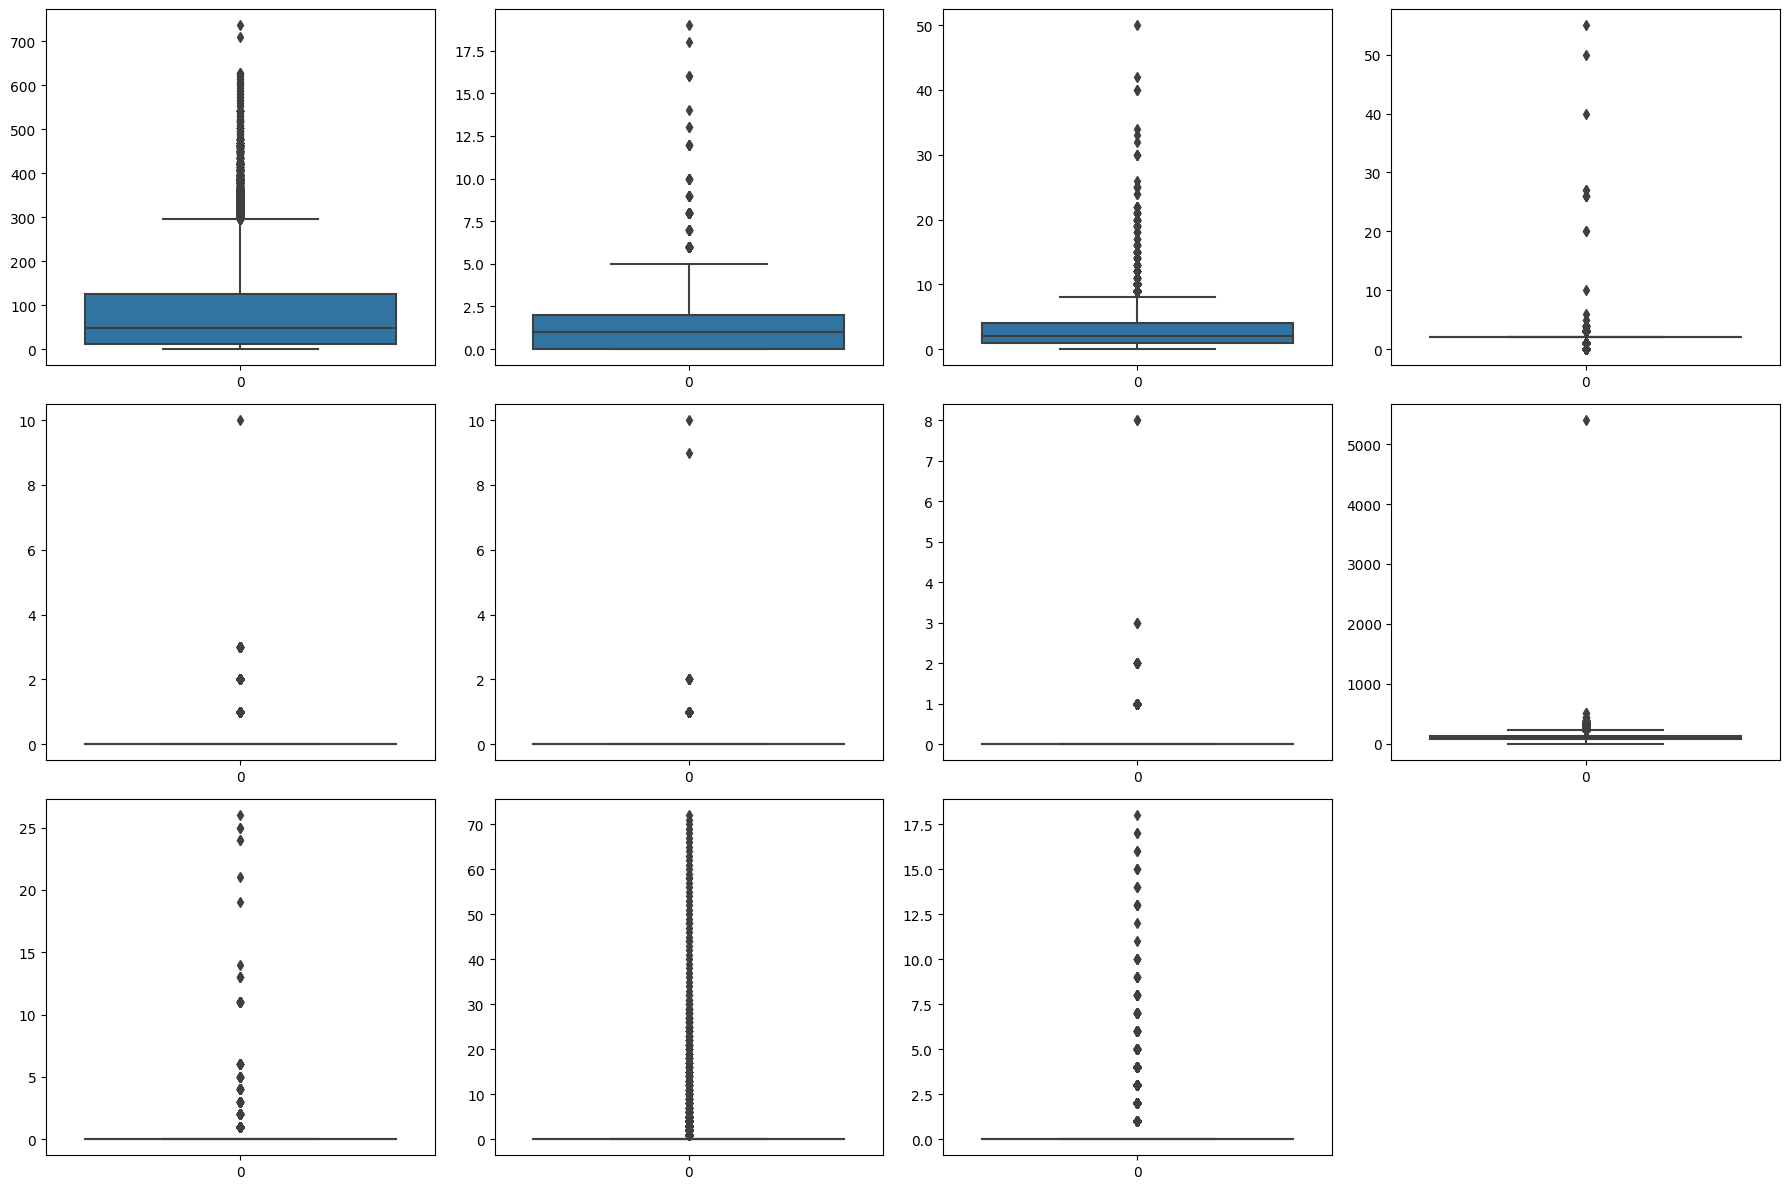

In [24]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(18,12))

for column in columns:
  plt.subplot(3,4,n)
  n = n+1
  sns.boxplot(data[column])
  plt.tight_layout()
plt.show()

As we can see that most of the outliers for almost all of the parameters are more than the upper limit. Hence , we have chosen to replace the outliers by the value on the right whisker of the box plot. Another option was to remove the rows with outlier values, but that will reduce the data set by almost 70%. We can lose a lot of valueable information that way. Hence, we remove the outliers by using conditionals to get and update these values.

In [33]:
data.loc[data.lead_time > 450, 'lead_time'] = 450
data.loc[data.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
data.loc[data.adults > 10, 'adults'] = 10
data.loc[data.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
data.loc[data.previous_cancellations > 0, 'previous_cancellations'] = 1
data.loc[data.stays_in_week_nights > 8, 'stays_in_week_nights'] = 8
data.loc[data.booking_changes > 5, 'booking_changes'] = 5
data.loc[data.babies > 8, 'babies'] = 0
data.loc[data.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
data.loc[data.children > 8, 'children'] = 0
data.loc[data.adr > 400, 'adr'] = 400

In [35]:
# columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
# n = 1
# plt.figure(figsize=(18,12))

# for column in columns:
#   plt.subplot(3,4,n)
#   n = n+1
#   sns.boxplot(data[column])
#   plt.tight_layout()
# plt.show()

* We removed the outliers. Our data is clean now.

In [38]:
# Lets create some features for better analysis



#Merge children and babies columns to a kids column.
data['kids'] = data.children + data.babies

#Create a total mumbers feature by adding kids and adults
data['total_members'] = data.kids + data.adults

In [40]:
#Convering numerical value [0,1] to categorical for better understanding.
data['is_canceled'] = data.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
data['is_repeated_guest']= data.is_repeated_guest.replace([1,0] , ['repeated_guest','not a repeated guest'])

In [49]:
print(len(data[data.duplicated()]))
data= data.drop_duplicates()
print(len(data[data.duplicated()]))

42


0

In [54]:
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay,kids,total_members
21129,Resort Hotel,not_canceled,0,2016,February,8,18,0,1,2,...,Transient,65.00,0,0,Check-Out,2016-02-19,2.0,1,0.0,2.0
6891,Resort Hotel,canceled,120,2016,July,28,9,2,5,2,...,Transient,160.71,0,1,Canceled,2016-05-10,2.0,7,0.0,2.0
78686,City Hotel,not_canceled,1,2015,October,42,14,0,1,2,...,Transient,109.00,0,0,Check-Out,2015-10-15,2.0,1,0.0,2.0
65773,City Hotel,canceled,69,2017,April,14,8,0,1,3,...,Transient,162.00,0,0,Canceled,2017-02-15,3.0,1,0.0,3.0
33899,Resort Hotel,not_canceled,7,2017,March,9,2,1,3,2,...,Transient-Party,37.00,0,0,Check-Out,2017-03-06,2.0,4,0.0,2.0


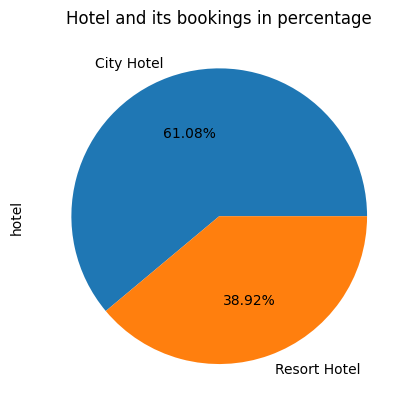

In [56]:
# EDA
# 1. Hotel Type and its bookings
data.hotel.value_counts().plot(kind = 'pie', autopct = '%1.2f%%')
plt.title("Hotel and its bookings in percentage")
plt.show()

* There are only 2 hotels i.e. 'City Hotel' and 'Resort Hotel'. City Hotel has more bookings as compared to bookings at the Resort Hotel.

In [64]:
# --------------------------------------------------------------------------------------------------------

# EDA

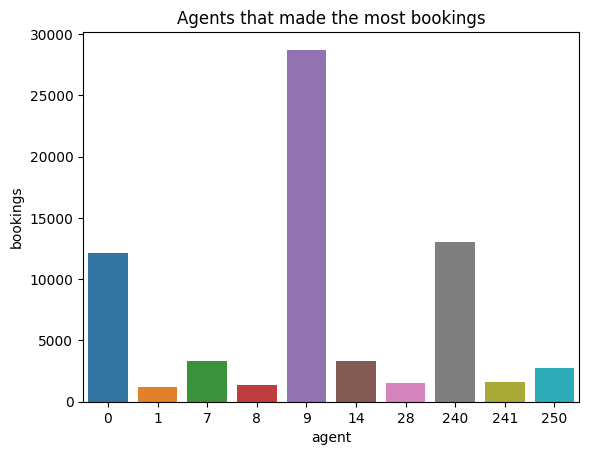

In [83]:
# Q1. Agents that made the most bookings
x = data['agent'].value_counts()
# y = data['num_of_bookings'].value_counts()
# data.columns

# Create a dataframe with Agents and their count
data_agent = pd.DataFrame(data['agent'].value_counts()).reset_index().rename(columns={'index':'agent','agent':'bookings'}).sort_values(by = 'bookings', ascending=False)
data_agent = data_agent[:10]
# data_agent


sns.barplot(x = 'agent', y = 'bookings', data = data_agent)
plt.title("Agents that made the most bookings")
plt.show()

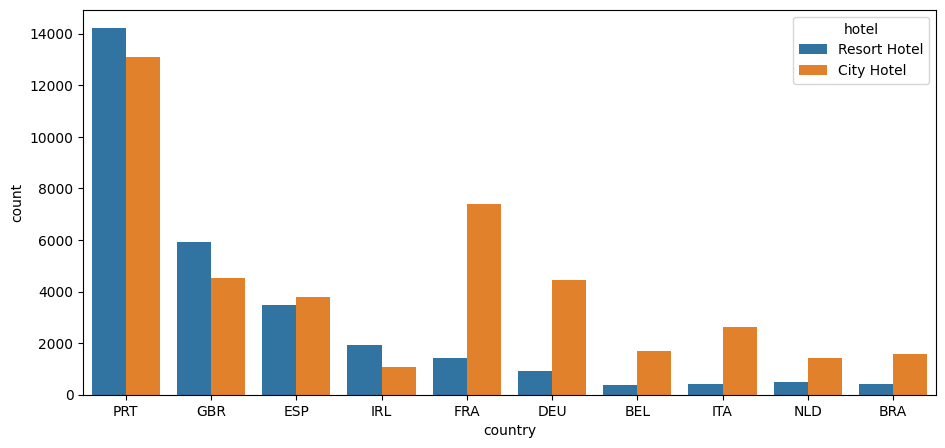

In [104]:
# adr - average daily rate, it's used to measure the average revenue that a hotel receives for each occupied guest room per day
# Q2. People travelling from top 10 Countries

x = data['country'].value_counts().head(10).index.to_list()
x1 = data[data['country'].isin(x)]
plt.figure(figsize=(11,5))
sns.countplot(x='country', hue = 'hotel', data= x1)
plt.show()

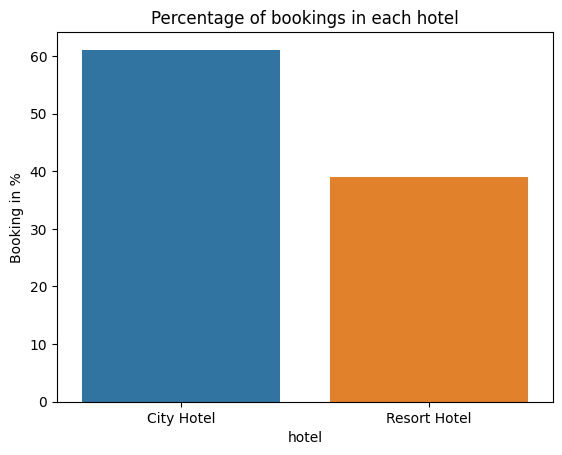

In [136]:
# Q3. Percentage of bookings in each hotel

grouped_by_hotel = data.groupby('hotel')
# grouped_by_hotel.first()
df = pd.DataFrame((grouped_by_hotel.size()/ data.shape[0]) *100).reset_index().rename(columns = {0: "Booking in %"})

sns.barplot(x = df['hotel'], y = df['Booking in %'])
plt.title("Percentage of bookings in each hotel")
plt.show()

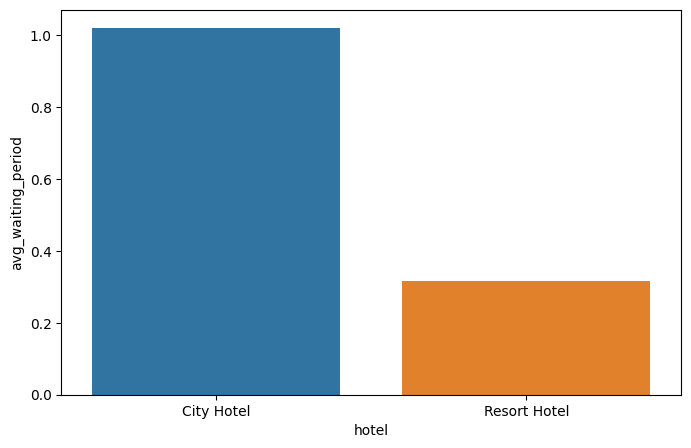

In [137]:
# Q4. Which hotel has longer waiting time

df = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = df['hotel'], y = df['avg_waiting_period'] )
plt.show()